# GEOLOCATION (MAJOR PROJECT)

## Sem7 group no. 27

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
!pip install folium
import folium
import seaborn as sns

In [2]:
codefood = pd.read_csv('food_coded.csv')
codefood.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [3]:
codefood.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded2',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       '

In [4]:
codefood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GPA                          123 non-null    object 
 1   Gender                       125 non-null    int64  
 2   breakfast                    125 non-null    int64  
 3   calories_chicken             125 non-null    int64  
 4   calories_day                 106 non-null    float64
 5   calories_scone               124 non-null    float64
 6   coffee                       125 non-null    int64  
 7   comfort_food                 124 non-null    object 
 8   comfort_food_reasons         124 non-null    object 
 9   comfort_food_reasons_coded   106 non-null    float64
 10  cook                         122 non-null    float64
 11  comfort_food_reasons_coded2  125 non-null    int64  
 12  cuisine                      108 non-null    float64
 13  diet_current        

In [5]:
codefood.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,125.0,1.392000,0.490161,1.0,1.0,1.0,2.0,2.0
breakfast,125.0,1.112000,0.316636,1.0,1.0,1.0,1.0,2.0
calories_chicken,125.0,577.320000,131.214156,265.0,430.0,610.0,720.0,720.0
calories_day,106.0,3.028302,0.639308,2.0,3.0,3.0,3.0,4.0
calories_scone,124.0,505.241935,230.840506,315.0,420.0,420.0,420.0,980.0
coffee,125.0,1.752000,0.433590,1.0,2.0,2.0,2.0,2.0
comfort_food_reasons_coded,106.0,2.698113,1.972042,1.0,2.0,2.0,3.0,9.0
cook,122.0,2.786885,1.038351,1.0,2.0,3.0,3.0,5.0
comfort_food_reasons_coded2,125.0,2.688000,1.910987,1.0,2.0,2.0,3.0,9.0
cuisine,108.0,1.388889,0.974759,1.0,1.0,1.0,1.0,6.0


In [6]:
codefood.isnull().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         21
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [7]:
#extracting the required columns
newcode = codefood[['cook', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'fruit_day', 'income', 'indian_food', 'marital_status', 'on_off_campus', 'pay_meal_out', 'sports', 'veggies_day']]
newcode.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,indian_food,marital_status,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,5,1.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,4,2.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,5,2.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,5,2.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,2,1.0,1.0,4,1.0,4


In [8]:
newcode.apply(pd.value_counts)

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,indian_food,marital_status,on_off_campus,pay_meal_out,sports,veggies_day
1.0,13.0,16.0,2.0,5.0,57.0,1.0,6,25.0,64.0,97.0,NaN,75.0,3.0
2.0,34.0,60.0,60.0,17.0,44.0,4.0,7,18.0,59.0,16.0,17.0,48.0,11.0
3.0,49.0,24.0,54.0,25.0,11.0,24.0,17,31.0,NaN,9.0,67.0,NaN,21.0
4.0,18.0,13.0,NaN,36.0,NaN,33.0,20,15.0,1.0,2.0,22.0,NaN,37.0
5.0,8.0,12.0,NaN,42.0,NaN,63.0,33,36.0,NaN,NaN,11.0,NaN,53.0
6.0,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,8.0,NaN,NaN


In [9]:
newcode.isnull().sum()

cook               3
eating_out         0
employment         9
ethnic_food        0
exercise          13
fruit_day          0
income             1
indian_food        0
marital_status     1
on_off_campus      1
pay_meal_out       0
sports             2
veggies_day        0
dtype: int64

In [10]:
df = newcode.fillna(newcode.median())

In [11]:
df.isnull().sum()

cook              0
eating_out        0
employment        0
ethnic_food       0
exercise          0
fruit_day         0
income            0
indian_food       0
marital_status    0
on_off_campus     0
pay_meal_out      0
sports            0
veggies_day       0
dtype: int64

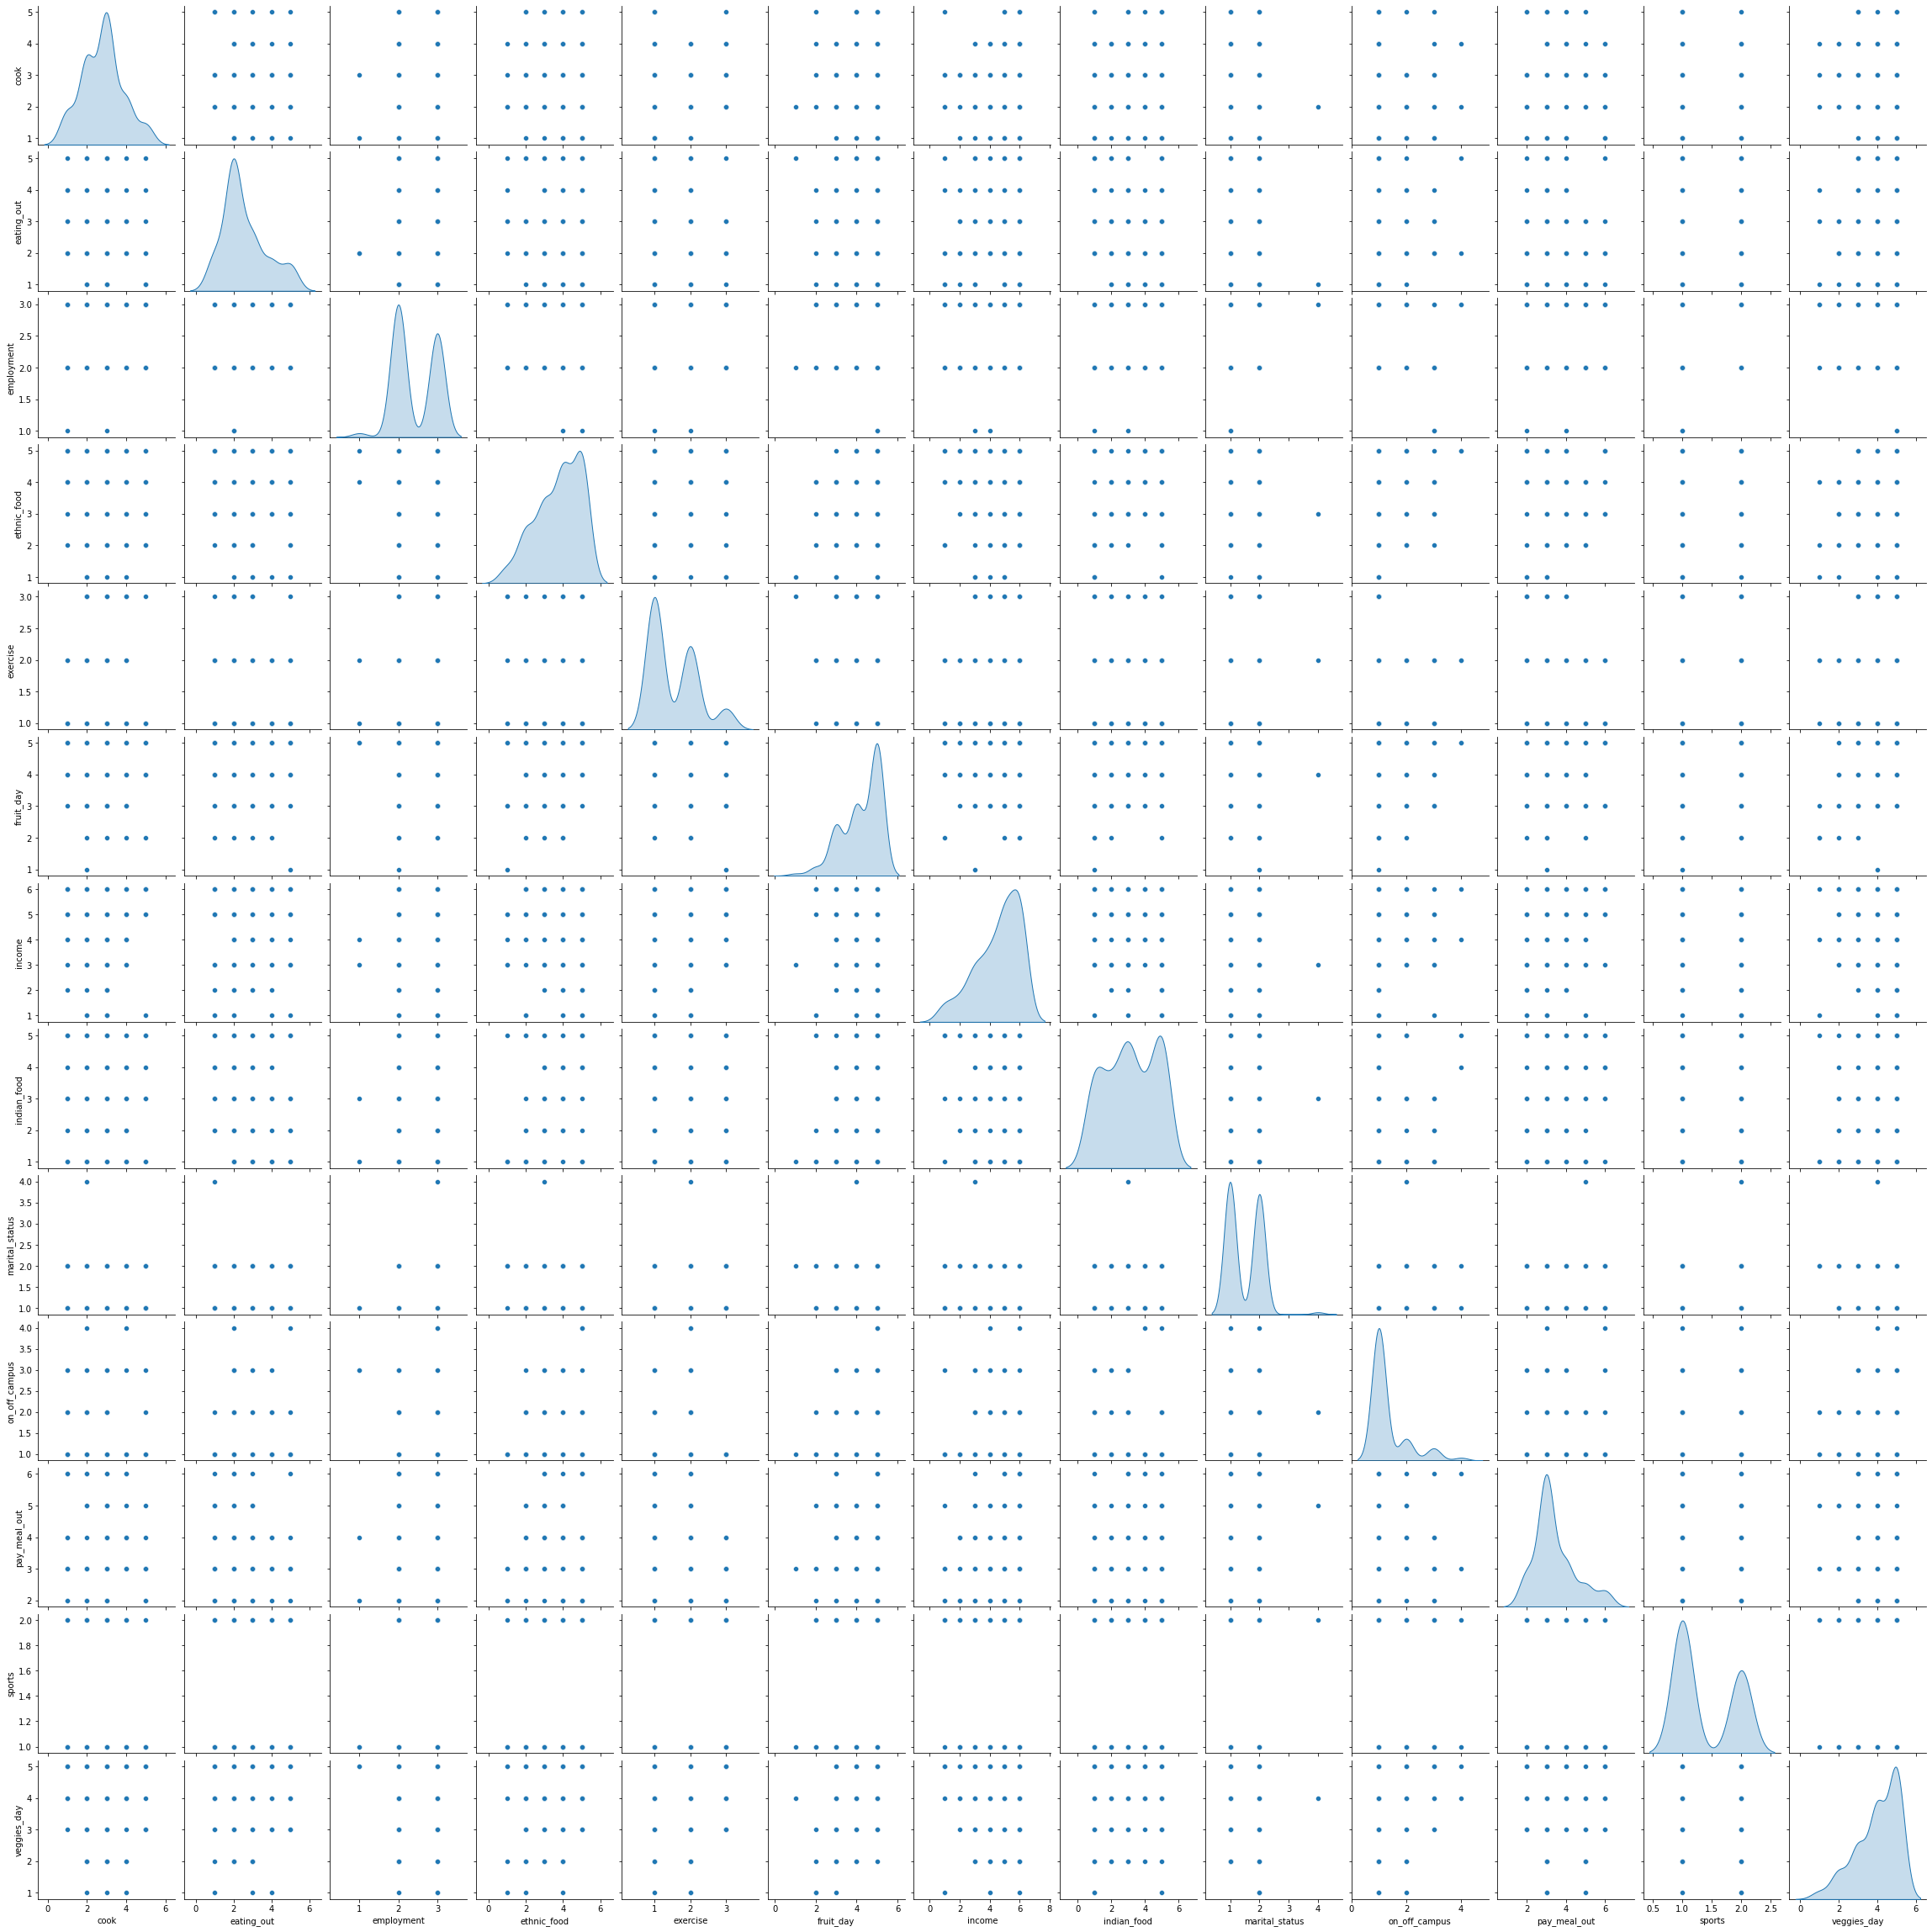

In [12]:
#visualizing the relation of attributes with each other
sns.pairplot(df, diag_kind='kde')

## Through the density curve, we can figure out that the data contain atleast 3 different clusters

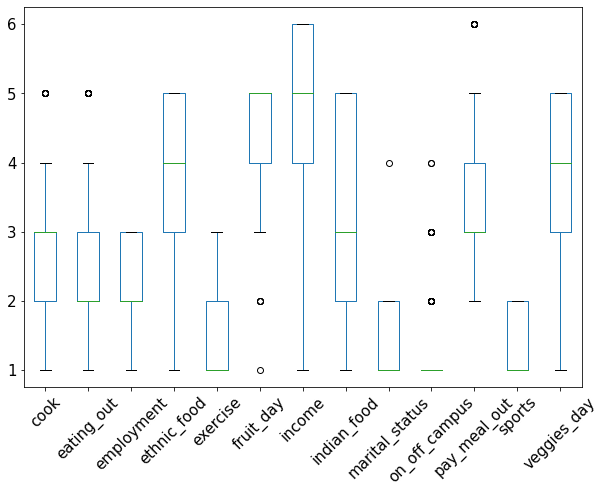

In [13]:
#visualizing the population and outliers of each columns
boxplot = df.boxplot(column = ['cook', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'fruit_day', 'income', 'indian_food', 'marital_status', 'on_off_campus', 'pay_meal_out', 'sports', 'veggies_day'],
                         grid=False, rot=45, fontsize=15, figsize=(10, 7))

In [14]:
#finding the value of cluster k through elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

C:\Users\Tejas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


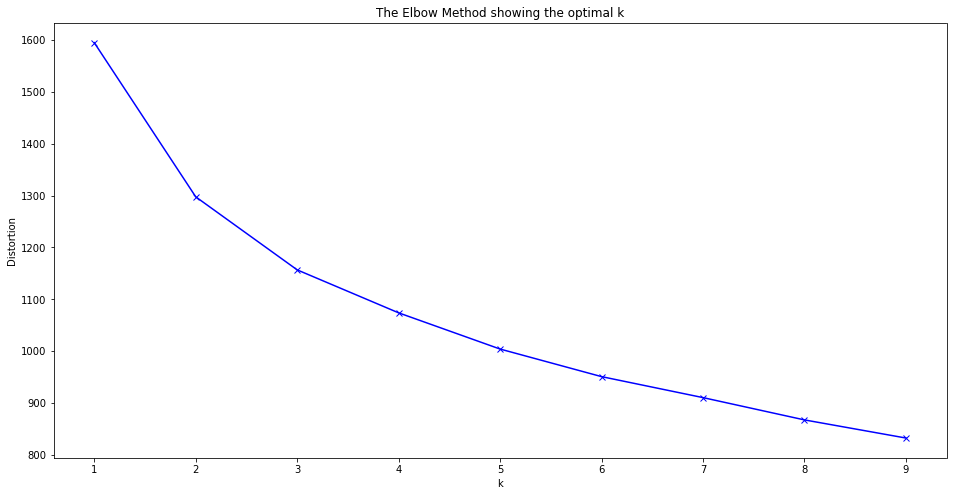

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Through Elbow method, we can confirm that the optimal value of k is 3

In [16]:
#Appling the kmeans algorithm on dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df)

In [17]:
kmeans.inertia_

1157.2878688524595

In [18]:
kmeans.cluster_centers_

array([[2.87179487, 2.87179487, 2.33333333, 2.61538462, 1.66666667,
        3.53846154, 4.58974359, 1.58974359, 1.46153846, 1.41025641,
        3.23076923, 1.48717949, 3.20512821],
       [2.81967213, 2.49180328, 2.50819672, 4.19672131, 1.3442623 ,
        4.60655738, 5.31147541, 3.67213115, 1.50819672, 1.24590164,
        3.57377049, 1.2295082 , 4.36065574],
       [2.6       , 2.24      , 2.32      , 4.4       , 1.76      ,
        4.36      , 2.56      , 4.32      , 1.52      , 1.36      ,
        3.28      , 1.6       , 4.4       ]])

In [19]:
from pandas.io.json import json_normalize
!pip install geopy
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF"
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR"
VERSION = '20200316'
LIMIT = 10000

In [20]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    19.076090, 72.877426,
    30000, 
    LIMIT)

In [21]:
results = requests.get(url).json()

In [22]:
results

{'meta': {'code': 200, 'requestId': '6325a90314e3c809b1c33c86'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '19.076090,72.877426', 'radius': '30000'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Mumbai',
  'headerFullLocation': 'Mumbai',
  'headerLocationGranularity': 'city',
  'totalResults': 212,
  'suggestedBounds': {'ne': {'lat': 19.34609027000027,
    'lng': 73.16258134589225},
   'sw': {'lat': 18.80608972999973, 'lng': 72.59227065410775}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteracti

In [23]:
venues = results['response']['groups'][0]['items']
near_venues = json_normalize(venues)

<ipython-input-23-c0814b0521f2>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  near_venues = json_normalize(venues)


In [24]:
near_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.postalCode,venue.location.city,venue.location.state,venue.venuePage.id,venue.location.neighborhood
0,e-0-546f25c5498e2d4d056ad6eb-0,0,"[{'summary': 'This spot is popular', 'type': '...",546f25c5498e2d4d056ad6eb,Starbucks Coffee Capital,The Capital,19.063457,72.861576,"[{'label': 'display', 'lat': 19.06345693697131...",2181,...,"[The Capital, India]","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-51d2a531454ad6055f94cdce-1,0,"[{'summary': 'This spot is popular', 'type': '...",51d2a531454ad6055f94cdce,Hamleys,Phoenix Market City Kurla,19.086655,72.889783,"[{'label': 'display', 'lat': 19.08665464005278...",1753,...,"[Phoenix Market City Kurla (LBS Marg,Near Kama...","[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",0,[],"LBS Marg,Near Kamani Junction, Kurla West",400070,Mumbai,Mahārāshtra,NaN,NaN
2,e-0-4b4c8f5df964a5201cb626e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b4c8f5df964a5201cb626e3,Khau Galli,MG Road,19.072234,72.896335,"[{'label': 'display', 'lat': 19.07223407873085...",2035,...,"[MG Road (Ghatkopar East), Mumbai 400077, Mahā...","[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",0,[],Ghatkopar East,400077,Mumbai,Mahārāshtra,NaN,NaN
3,e-0-4dc6a998b0fb5556cd0e99a2-3,0,"[{'summary': 'This spot is popular', 'type': '...",4dc6a998b0fb5556cd0e99a2,IVY Restaurant & Banquets,Above Shoppers' Stop,19.069663,72.900535,"[{'label': 'display', 'lat': 19.06966328826220...",2534,...,"[Above Shoppers' Stop (Near Amar Mahal, Chembu...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],"Near Amar Mahal, Chembur- Ghatkopar",400089,Mumbai,Mahārāshtra,72795032,NaN
4,e-0-54a3a602498e6d5ac992f927-4,0,"[{'summary': 'This spot is popular', 'type': '...",54a3a602498e6d5ac992f927,JW Marriott Mumbai Sahar,"IA Project Road, Chhatrapati Shivaji Internati...",19.102502,72.878236,"[{'label': 'display', 'lat': 19.102502, 'lng':...",2941,...,"[IA Project Road, Chhatrapati Shivaji Internat...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,400099,Mumbai,Mahārāshtra,418953263,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4d63eb3a03e2721eb365132f-95,0,"[{'summary': 'This spot is popular', 'type': '...",4d63eb3a03e2721eb365132f,Naturals,NaN,19.220698,72.851589,"[{'label': 'display', 'lat': 19.22069767305576...",16325,...,[India],"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN,NaN,NaN,NaN,NaN
96,e-0-517146aae4b047969f148d5b-96,0,"[{'summary': 'This spot is popular', 'type': '...",517146aae4b047969f148d5b,Starbucks,Infinity 2 Mall,19.184860,72.834266,"[{'label': 'display', 'lat': 19.18486003455577...",12931,...,"[Infinity 2 Mall (Malad West), Mumbai 400064, ...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],Malad West,400064,Mumbai,Mahārāshtra,NaN,NaN
97,e-0-4c1efc7963750f474693ba67-97,0,"[{'summary': 'This spot is popular', 'type': '...",4c1efc7963750f474693ba67,Trident,Nariman Point,18.927878,72.820711,"[{'label': 'display', 'lat': 18.92787752948028...",17545,...,"[Nariman Point, Mumbai 400 021, Mahārāshtra, I...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,400 021,Mumbai,Mahārāshtra,NaN,NaN
98,e-0-4b0587def964a520fba422e3-98,0,"[{'summary': 'This spot is popular', 'type': '...",4b0587def964a520fba422e3,Inorbit Mall,"Mindspace, Link Road",19.173065,72.835755,"[{'label': 'display', 'lat': 19.17306538569318...",11650,...,"[Mindspace, Link Road (Malad (W)), Mumbai 4000...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],Malad (W),400064,Mumbai,Mahārāshtra,NaN,NaN


In [25]:
resta=[]
oth=[]
for lat,long in zip(near_venues['venue.location.lat'],near_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    near_venue = json_normalize(venue)
    df=near_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

near_venues['restaurant']=resta
near_venues['others']=oth
near_venues

<ipython-input-25-e5a7d9c78ff4>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  near_venue = json_normalize(venue)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.postalCode,venue.location.city,venue.location.state,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-546f25c5498e2d4d056ad6eb-0,0,"[{'summary': 'This spot is popular', 'type': '...",546f25c5498e2d4d056ad6eb,Starbucks Coffee Capital,The Capital,19.063457,72.861576,"[{'label': 'display', 'lat': 19.06345693697131...",2181,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,37,12
1,e-0-51d2a531454ad6055f94cdce-1,0,"[{'summary': 'This spot is popular', 'type': '...",51d2a531454ad6055f94cdce,Hamleys,Phoenix Market City Kurla,19.086655,72.889783,"[{'label': 'display', 'lat': 19.08665464005278...",1753,...,0,[],"LBS Marg,Near Kamani Junction, Kurla West",400070,Mumbai,Mahārāshtra,NaN,NaN,36,21
2,e-0-4b4c8f5df964a5201cb626e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b4c8f5df964a5201cb626e3,Khau Galli,MG Road,19.072234,72.896335,"[{'label': 'display', 'lat': 19.07223407873085...",2035,...,0,[],Ghatkopar East,400077,Mumbai,Mahārāshtra,NaN,NaN,20,11
3,e-0-4dc6a998b0fb5556cd0e99a2-3,0,"[{'summary': 'This spot is popular', 'type': '...",4dc6a998b0fb5556cd0e99a2,IVY Restaurant & Banquets,Above Shoppers' Stop,19.069663,72.900535,"[{'label': 'display', 'lat': 19.06966328826220...",2534,...,0,[],"Near Amar Mahal, Chembur- Ghatkopar",400089,Mumbai,Mahārāshtra,72795032,NaN,31,14
4,e-0-54a3a602498e6d5ac992f927-4,0,"[{'summary': 'This spot is popular', 'type': '...",54a3a602498e6d5ac992f927,JW Marriott Mumbai Sahar,"IA Project Road, Chhatrapati Shivaji Internati...",19.102502,72.878236,"[{'label': 'display', 'lat': 19.102502, 'lng':...",2941,...,0,[],NaN,400099,Mumbai,Mahārāshtra,418953263,NaN,62,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4d63eb3a03e2721eb365132f-95,0,"[{'summary': 'This spot is popular', 'type': '...",4d63eb3a03e2721eb365132f,Naturals,NaN,19.220698,72.851589,"[{'label': 'display', 'lat': 19.22069767305576...",16325,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,24,10
96,e-0-517146aae4b047969f148d5b-96,0,"[{'summary': 'This spot is popular', 'type': '...",517146aae4b047969f148d5b,Starbucks,Infinity 2 Mall,19.184860,72.834266,"[{'label': 'display', 'lat': 19.18486003455577...",12931,...,0,[],Malad West,400064,Mumbai,Mahārāshtra,NaN,NaN,47,25
97,e-0-4c1efc7963750f474693ba67-97,0,"[{'summary': 'This spot is popular', 'type': '...",4c1efc7963750f474693ba67,Trident,Nariman Point,18.927878,72.820711,"[{'label': 'display', 'lat': 18.92787752948028...",17545,...,0,[],NaN,400 021,Mumbai,Mahārāshtra,NaN,NaN,52,28
98,e-0-4b0587def964a520fba422e3-98,0,"[{'summary': 'This spot is popular', 'type': '...",4b0587def964a520fba422e3,Inorbit Mall,"Mindspace, Link Road",19.173065,72.835755,"[{'label': 'display', 'lat': 19.17306538569318...",11650,...,0,[],Malad (W),400064,Mumbai,Mahārāshtra,NaN,NaN,40,20


In [26]:
mum_lat=near_venues['venue.location.lat']
mum_long=near_venues['venue.location.lng']

C:\Users\Tejas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


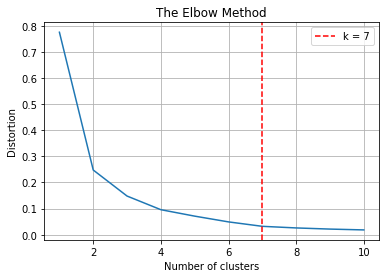

In [27]:
f=['venue.location.lat','venue.location.lng']
X = near_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [28]:
city = "Mumbai"
## get location
locator = Nominatim(user_agent="http")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[mum_lat, mum_long]:", location)

Mumbai, Mumbai Metropolitan Region, Mumbai Suburban, Maharashtra, India
[mum_lat, mum_long]: [19.0785451, 72.878176]


In [29]:
near_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.postalCode,venue.location.city,venue.location.state,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-546f25c5498e2d4d056ad6eb-0,0,"[{'summary': 'This spot is popular', 'type': '...",546f25c5498e2d4d056ad6eb,Starbucks Coffee Capital,The Capital,19.063457,72.861576,"[{'label': 'display', 'lat': 19.06345693697131...",2181,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,37,12
1,e-0-51d2a531454ad6055f94cdce-1,0,"[{'summary': 'This spot is popular', 'type': '...",51d2a531454ad6055f94cdce,Hamleys,Phoenix Market City Kurla,19.086655,72.889783,"[{'label': 'display', 'lat': 19.08665464005278...",1753,...,0,[],"LBS Marg,Near Kamani Junction, Kurla West",400070,Mumbai,Mahārāshtra,NaN,NaN,36,21
2,e-0-4b4c8f5df964a5201cb626e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b4c8f5df964a5201cb626e3,Khau Galli,MG Road,19.072234,72.896335,"[{'label': 'display', 'lat': 19.07223407873085...",2035,...,0,[],Ghatkopar East,400077,Mumbai,Mahārāshtra,NaN,NaN,20,11
3,e-0-4dc6a998b0fb5556cd0e99a2-3,0,"[{'summary': 'This spot is popular', 'type': '...",4dc6a998b0fb5556cd0e99a2,IVY Restaurant & Banquets,Above Shoppers' Stop,19.069663,72.900535,"[{'label': 'display', 'lat': 19.06966328826220...",2534,...,0,[],"Near Amar Mahal, Chembur- Ghatkopar",400089,Mumbai,Mahārāshtra,72795032,NaN,31,14
4,e-0-54a3a602498e6d5ac992f927-4,0,"[{'summary': 'This spot is popular', 'type': '...",54a3a602498e6d5ac992f927,JW Marriott Mumbai Sahar,"IA Project Road, Chhatrapati Shivaji Internati...",19.102502,72.878236,"[{'label': 'display', 'lat': 19.102502, 'lng':...",2941,...,0,[],NaN,400099,Mumbai,Mahārāshtra,418953263,NaN,62,38


In [30]:
near_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.cc',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.postalCode',
       'venue.location.city', 'venue.location.state', 'venue.venuePage.id',
       'venue.location.neighborhood', 'restaurant', 'others'],
      dtype='object')

In [31]:
nv = near_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.neighborhood',	'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [32]:
nv.columns

Index(['venue.name', 'venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

In [33]:
nv

,venue.name,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,Starbucks Coffee Capital,19.063457,72.861576,"[The Capital, India]",37,12
1,Hamleys,19.086655,72.889783,"[Phoenix Market City Kurla (LBS Marg,Near Kama...",36,21
2,Khau Galli,19.072234,72.896335,"[MG Road (Ghatkopar East), Mumbai 400077, Mahā...",20,11
3,IVY Restaurant & Banquets,19.069663,72.900535,"[Above Shoppers' Stop (Near Amar Mahal, Chembu...",31,14
4,JW Marriott Mumbai Sahar,19.102502,72.878236,"[IA Project Road, Chhatrapati Shivaji Internat...",62,38
...,...,...,...,...,...,...
95,Naturals,19.220698,72.851589,[India],24,10
96,Starbucks,19.184860,72.834266,"[Infinity 2 Mall (Malad West), Mumbai 400064, ...",47,25
97,Trident,18.927878,72.820711,"[Nariman Point, Mumbai 400 021, Mahārāshtra, I...",52,28
98,Inorbit Mall,19.173065,72.835755,"[Mindspace, Link Road (Malad (W)), Mumbai 4000...",40,20


In [34]:
nv.isnull().sum()

venue.name                         0
venue.location.lat                 0
venue.location.lng                 0
venue.location.formattedAddress    0
restaurant                         0
others                             0
dtype: int64

In [35]:
spec_chars = ["[","]"]
for char in spec_chars:
  nv['venue.location.formattedAddress'] = nv['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')

<ipython-input-35-3678ba6ec4d3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  nv['venue.location.formattedAddress'] = nv['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


In [36]:
nv

,venue.name,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,Starbucks Coffee Capital,19.063457,72.861576,"'The Capital', 'India'",37,12
1,Hamleys,19.086655,72.889783,"'Phoenix Market City Kurla (LBS Marg,Near Kam...",36,21
2,Khau Galli,19.072234,72.896335,"'MG Road (Ghatkopar East)', 'Mumbai 400077', ...",20,11
3,IVY Restaurant & Banquets,19.069663,72.900535,"""Above Shoppers' Stop (Near Amar Mahal, Chemb...",31,14
4,JW Marriott Mumbai Sahar,19.102502,72.878236,"'IA Project Road, Chhatrapati Shivaji Interna...",62,38
...,...,...,...,...,...,...
95,Naturals,19.220698,72.851589,'India',24,10
96,Starbucks,19.184860,72.834266,"'Infinity 2 Mall (Malad West)', 'Mumbai 40006...",47,25
97,Trident,18.927878,72.820711,"'Nariman Point', 'Mumbai 400 021', 'Mahārāsht...",52,28
98,Inorbit Mall,19.173065,72.835755,"'Mindspace, Link Road (Malad (W))', 'Mumbai 4...",40,20


In [37]:
nv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   venue.name                       100 non-null    object 
 1   venue.location.lat               100 non-null    float64
 2   venue.location.lng               100 non-null    float64
 3   venue.location.formattedAddress  100 non-null    object 
 4   restaurant                       100 non-null    int64  
 5   others                           100 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [38]:
nv = nv.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})

In [39]:
from sklearn import preprocessing
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = nv.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(nv[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_

In [43]:
import scipy
k = 6
model = KMeans(n_clusters=k, init='k-means++')
X = nv[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
nv[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
nv

C:\Users\Tejas\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,venue.name,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,Starbucks Coffee Capital,19.063457,72.861576,"'The Capital', 'India'",37,12,0,0
1,Hamleys,19.086655,72.889783,"'Phoenix Market City Kurla (LBS Marg,Near Kam...",36,21,0,0
2,Khau Galli,19.072234,72.896335,"'MG Road (Ghatkopar East)', 'Mumbai 400077', ...",20,11,0,0
3,IVY Restaurant & Banquets,19.069663,72.900535,"""Above Shoppers' Stop (Near Amar Mahal, Chemb...",31,14,0,0
4,JW Marriott Mumbai Sahar,19.102502,72.878236,"'IA Project Road, Chhatrapati Shivaji Interna...",62,38,0,0
...,...,...,...,...,...,...,...,...
95,Naturals,19.220698,72.851589,'India',24,10,1,0
96,Starbucks,19.184860,72.834266,"'Infinity 2 Mall (Malad West)', 'Mumbai 40006...",47,25,1,0
97,Trident,18.927878,72.820711,"'Nariman Point', 'Mumbai 400 021', 'Mahārāsht...",52,28,2,0
98,Inorbit Mall,19.173065,72.835755,"'Mindspace, Link Road (Malad (W))', 'Mumbai 4...",40,20,1,0


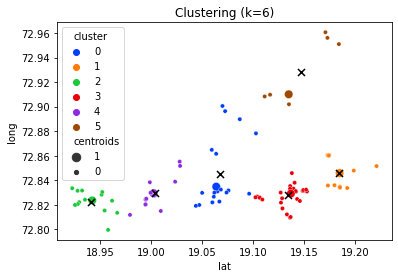

In [44]:
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=nv, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [50]:
from sklearn import cluster
model = cluster.AffinityPropagation()

In [51]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = nv.copy()
## create color column
lst_elements = sorted(list(nv[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(nv[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_